# Mahla Entezari 401222017

### Homework 3

# Theoretical Exercises

## Exercise 1
##### What is gradient accumulation?
##### When should we use this technique?
##### How to perform this in PyTorch?

Gradient accumulation is used when we cannot increase the number of batches because we don't have a powerful GPU.
This technique is such that it doesn't update the weights at each step, and for example, it calls the optimizer every 10 steps and divides the accumulated gradient by the number of steps so that it is not too large.
##### in pytorch :

## Exercise 2
##### Describe the backpropagation details in the convolutional layers.

Backpropagation in convolutional layers involves computing gradients of the loss function with respect to the output feature maps, convolving these gradients with the input feature maps to obtain weight updates for filters.\
The gradients are then backpropagated through the convolutional operation by convolving them with the rotated filters to compute gradients for the input feature maps.\
Regularization techniques like L2 regularization or dropout may be employed to prevent overfitting.\
Finally, optimization algorithms like stochastic gradient descent (SGD) or its variants are used to update the filter weights, iteratively minimizing the loss function.

## Exercise 3
##### What are the benefits of the pooling layers?
##### What are the drawbacks of the pooling layers?
##### How do max pooling and average pooling differ in their operations?
##### When might one be preferred over the other?
##### Can you use these layers frequently?

Pooling is used to reduce dimensions and make calculations faster. In this way, it chooses the largest or average of a number of cells next to each other and places them in a smaller matrix.\
As mentioned, one of its benefits is reducing dimensions and computation and increasing speed.\
Since this work selects one cell from a number of cells, it means it discards a number of cells and this causes information to be lost and is one of the disadvantages of this method.\
The difference between max and average is that one takes the average of the cells and the other is the maximum.\
Max is used when differences are important to us and some features are given a lot of attention and lesser features are ignored.\
But the average is used when all features are important to us and we are not looking for a specific feature and we want our network to be sensitive to small differences as well.

## Exercise 4
##### Discuss the concept of transfer learning in the context of CNNs.
##### How does it allow leveraging pre-trained models for tasks with limited training data?
##### Provide examples of popular pre-trained CNN models and the tasks they are commonly used for.

Transfer learning in CNN involves using pre-trained models on large datasets for similar tasks, extracting features from the convolutional base of the pre-trained model, and fine-tuning it on a target dataset with limited data.\
Popular pre-trained CNN models such as VGG, ResNet, Inception, and MobileNet are commonly used for tasks such as image classification, object detection, and image segmentation, which enable efficient use of limited training data.

## Exercise 5
###### True/False, Explain the reason:
##### - Face verification requires comparing a new picture against one person’s face, whereas face recognition requires comparing a new picture against K person’s faces.
##### - In order to train the parameters of a face recognition system, it would be reasonable to use a training set comprising 100,000 pictures of 100,000 different persons

True\
Because in order to see if a photo is a photo of a face or not, it is enough to compare it with a photo of a face, but we cannot distinguish whose photo it is by a comparison.\
\
False\
This amount of data is difficult or impossible to find, and if it is found and our model is trained on them, it will overfit and start memorizing instead of learning.\
It is good if we have enough photos of each person, neither too few nor too many.

# Practical Exercise

In [35]:
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from scipy import signal

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [36]:
def preprocess(image_dir):
    image_data = []
    labels = []
    
    for category in os.listdir(image_dir):
        category_dir = os.path.join(image_dir, category)
        if os.path.isdir(category_dir):
            for image_file in os.listdir(category_dir):
                image_path = os.path.join(category_dir, image_file)
                ext = os.path.splitext(image_path)[-1].lower()
                if ext==".jpg":
                    with Image.open(image_path) as img:
                        img = img.convert('RGB').resize((64, 64))
                        
                        pixels = np.array(img)
                        
                        image_data.append(pixels)
                        labels.append(category)
                    
    
    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels


In [37]:
image_data, labels = preprocess('Dataset/train')
test_data, test_labels = preprocess('Dataset/test')

In [38]:
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

num_classes = len(label_encoder.classes_)

y_train = to_categorical(numerical_labels, num_classes)
x_train, x_valid, y_train, y_valid = train_test_split(image_data, y_train, test_size=0.2, random_state=42)


y_test = to_categorical(numerical_labels, num_classes)
x_test = image_data


In [39]:
input_layer = layers.Input(shape=(64, 64, 3))

conv1 = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = layers.MaxPooling2D((2, 2))(conv1)
conv2 = layers.Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D((2, 2))(conv2)
conv3 = layers.Conv2D(128, (3, 3), activation='relu')(pool2)
pool3 = layers.MaxPooling2D((2, 2))(conv3)
flatten = layers.Flatten()(pool3)
dropout1 = layers.Dropout(0.5)(flatten)
dense1 = layers.Dense(128, activation='relu')(dropout1)
dropout2 = layers.Dropout(0.5)(dense1)
output = layers.Dense(num_classes, activation='softmax')(dropout2)

model = models.Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_245"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
def reshape_images(data):
    num_samples = data.shape[0]
    return data.reshape(num_samples, 64, 64, 3)

x_train = reshape_images(x_train)
x_valid = reshape_images(x_valid)

In [41]:
history = model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.2223 - loss: 6.2667 - val_accuracy: 0.4344 - val_loss: 1.6063
Epoch 2/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.4158 - loss: 1.6686 - val_accuracy: 0.5291 - val_loss: 1.3463
Epoch 3/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.4861 - loss: 1.4828 - val_accuracy: 0.5755 - val_loss: 1.3045
Epoch 4/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.5453 - loss: 1.3172 - val_accuracy: 0.6022 - val_loss: 1.2066
Epoch 5/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5919 - loss: 1.2141 - val_accuracy: 0.6185 - val_loss: 1.1100
Epoch 6/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6370 - loss: 1.0833 - val_accuracy: 0.6481 - val_loss: 1.0418
Epoch 7/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6454 - loss: 1.0658 - val_accuracy: 0.6846 - val_loss: 0.9884
Epoch 8/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6753 - loss: 0.9424 - val_accu

In [42]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9184 - loss: 0.3312


In [44]:
layer_name = 'conv2d'  

layer_output = model.get_layer(layer_name).output

model_layers = Model(inputs=model.input, outputs=layer_output)

input_image = plt.imread("Dataset/train/bell_tower/1004.jpg") 
input_image = tf.image.resize(input_image, (64, 64))
input_image = np.expand_dims(input_image, axis=0)

layers = model_layers.predict(input_image)
plt.figure(figsize=(10, 10))
for i in range(layers.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(layers[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


ValueError: No such layer: conv2d. Existing layers are: ['input_layer_1', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'flatten_1', 'dropout_2', 'dense_2', 'dropout_3', 'dense_3'].

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


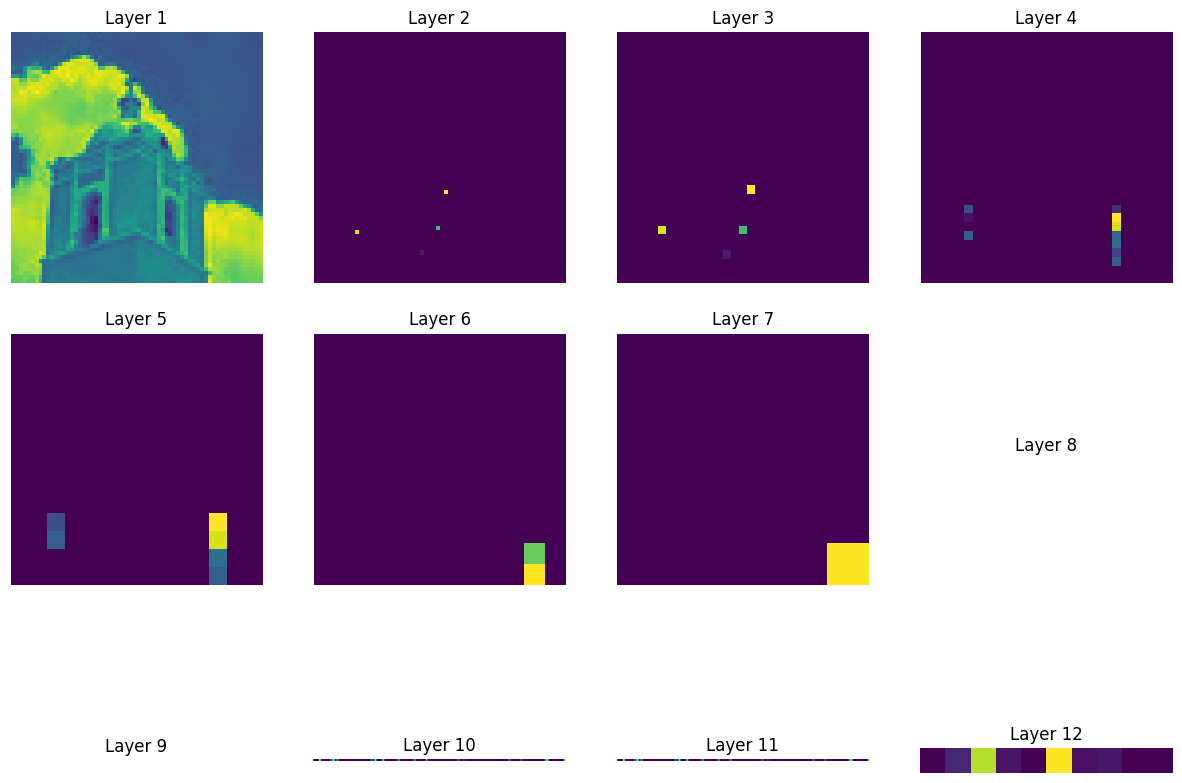

In [ ]:
model_layers = []
for layer in model.layers:
    in_model = Model(inputs=model.input, outputs=layer.output)
    model_layers.append(in_model)

input_image = plt.imread("Dataset/train/bell_tower/1004.jpg") 
input_image = tf.image.resize(input_image, (64, 64))
input_image = np.expand_dims(input_image, axis=0)

plt.figure(figsize=(15, 15))
for i, in_model in enumerate(model_layers):
    layers = in_model.predict(input_image)
    plt.subplot(4, 4, i + 1)
    plt.title(f'Layer {i + 1}')
    
    if len(layers.shape) == 4: 
        plt.imshow(layers[0, :, :, 0], cmap='viridis')
    elif len(layers.shape) == 2:  
        features = layers.shape[1]
        side = int(np.sqrt(features))
        if side * side == features: 
            plt.imshow(layers[0].reshape(side, side), cmap='viridis')
        else:
            plt.imshow(layers[0].reshape(1, -1), cmap='viridis')  # Show as a row
    
    plt.axis('off')
plt.show()


317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


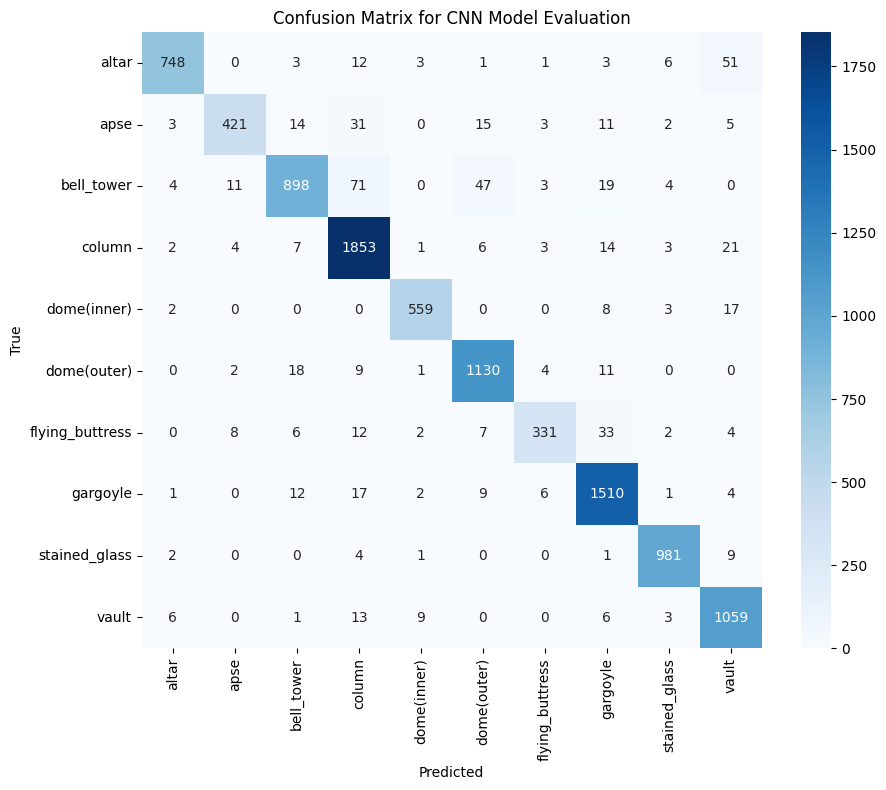

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


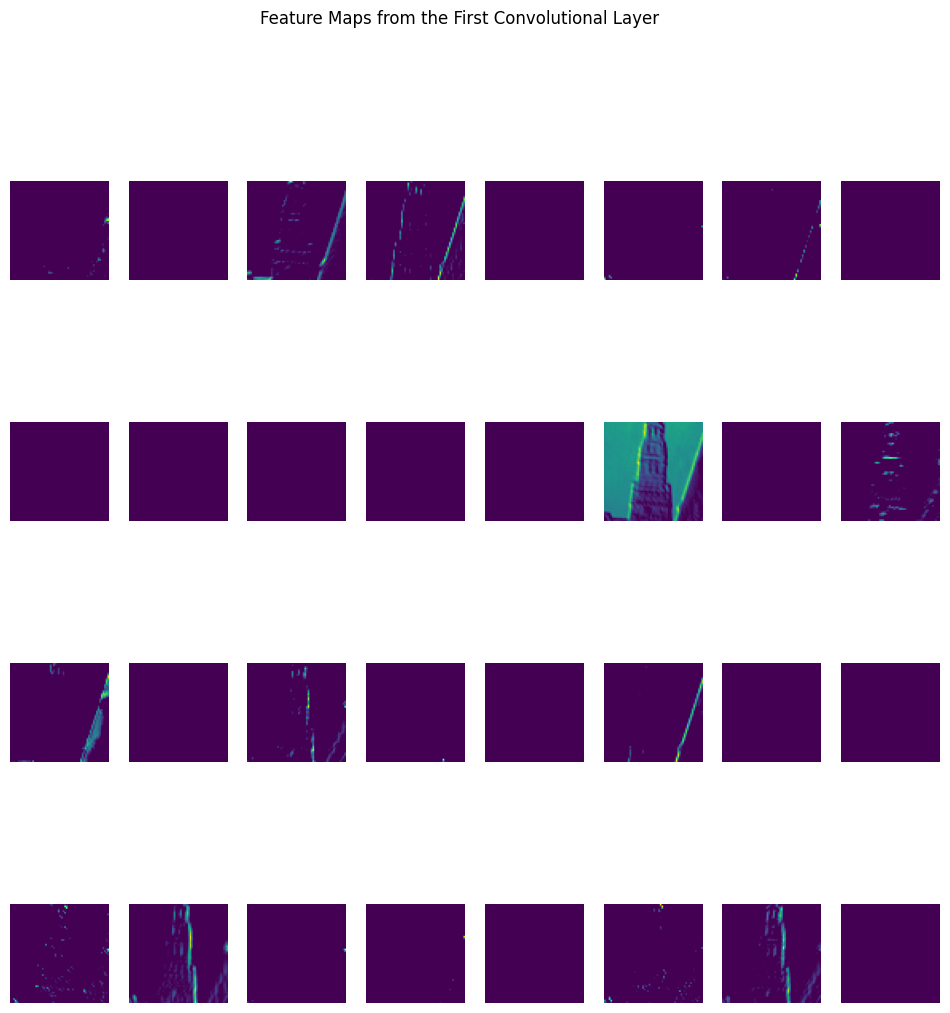

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)  
y_true = np.argmax(y_test, axis=1) 

cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for CNN Model Evaluation')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()

activation_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[1].output)

sample_image = np.expand_dims(x_test[0], axis=0)

feature_maps = activation_model.predict(sample_image)

num_filters = feature_maps.shape[-1]
size = feature_maps.shape[1]

plt.figure(figsize=(12, 12))
for i in range(num_filters):
    plt.subplot(num_filters // 8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Feature Maps from the First Convolutional Layer')
plt.savefig('feature_maps_layer1.png')
plt.show()
